In [3]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from os import getcwd

pd.set_option('notebook_repr_html', True, 'max_columns', 0)
%matplotlib inline

In [139]:
path=r'C:\Users\roni.shashua\Desktop\payton\part_2\project 2'
df_data = pd.read_csv(path + "\\train.csv")
df_data['DateTime'] = pd.to_datetime(df_data['DateTime'])
df_data.set_index('DateTime', inplace=True)
df_data.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
DateTime,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [140]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26729 entries, 2014-02-12 18:22:00 to 2015-07-02 09:00:00
Data columns (total 9 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [141]:
df_data.describe()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,5,16,2,5,44,1380,366
top,A689722,Max,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,10769,7816,15595,9779,3969,8810,2824


In [270]:
df_data.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
DateTime,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


Finding AnimalType distribution

In [271]:
df_data['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

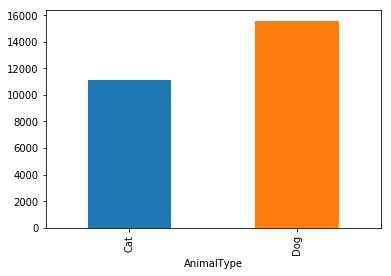

In [272]:
df_data.groupby('AnimalType')['AnimalID'].count().plot(kind='bar')

Finding SexuponOutcome distribution

                 AnimalID
SexuponOutcome           
Intact Female   13.136037
Intact Male     13.188417
Neutered Male   36.587100
Spayed Female   32.999102
Unknown          4.089345


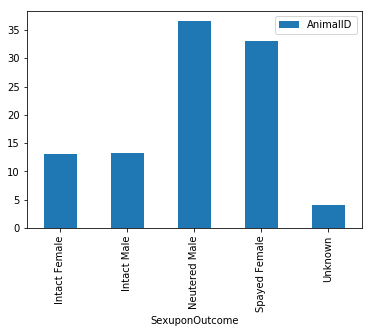

In [279]:
df_SexuponOutcome=df_data.groupby('SexuponOutcome').agg({'AnimalID': 'count'})
SexuponOutcome_total = df_SexuponOutcome.agg({'AnimalID': 'sum'})
df_SexuponOutcome=(df_SexuponOutcome.div(SexuponOutcome_total, level='SexuponOutcome_total') * 100)
print(df_SexuponOutcome)
df_SexuponOutcome.plot(kind='bar')

Finding SexuponOutcome distribution by AnimalType

In [58]:
df_data.groupby(['SexuponOutcome','AnimalType'])['AnimalType'].count().unstack()

AnimalType,Cat,Dog
SexuponOutcome,,
Intact Female,2114,1397
Intact Male,1927,1598
Neutered Male,3065,6714
Spayed Female,3012,5808
Unknown,1016,77


Finding SexuponOutcome distribution by AnimalType - count

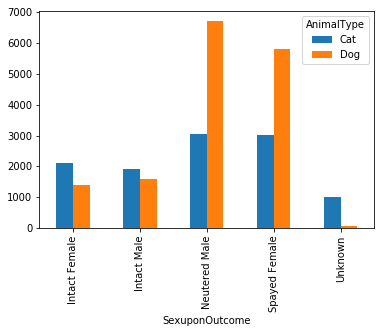

In [376]:
df_data.groupby(['SexuponOutcome','AnimalType'])['AnimalType'].count().unstack().plot(kind='bar')

Finding SexuponOutcome distribution by AnimalType - Percent from total

In [290]:
df_SexuponOutcome = df_data.groupby(['SexuponOutcome','AnimalType'])['AnimalType'].count().unstack()
SexuponOutcome_total = df_SexuponOutcome.agg({'Dog': 'sum','Cat': 'sum'})
#print(SexuponOutcome_total)
df_SexuponOutcome['Dog']=(df_SexuponOutcome['Dog'].div(SexuponOutcome_total['Dog'] ) * 100)
df_SexuponOutcome['Cat']=(df_SexuponOutcome['Cat'].div(SexuponOutcome_total['Cat'] ) * 100)
print(df_SexuponOutcome)

AnimalType            Cat        Dog
SexuponOutcome                      
Intact Female   18.986887   8.958574
Intact Male     17.307347  10.247531
Neutered Male   27.528292  43.055021
Spayed Female   27.052272  37.245094
Unknown          9.125202   0.493780


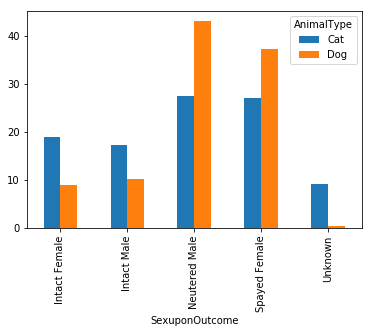

In [291]:
df_SexuponOutcome.plot(kind='bar')

Finding Animal age distribution

In [302]:
def agetodays(x):
        try:
            y = x.split()
        except:
            return None 
        if 'year' in y[1]:
            return float(y[0]) * 365
        elif 'month' in y[1]:
            return float(y[0]) * (365/12)
        elif 'week' in y[1]:
            return float(y[0]) * 7
        elif 'day' in y[1]:
            return float(y[0])

In [303]:
df_data['age']=df_data['AgeuponOutcome'].apply(agetodays, 'AgeuponOutcome')

In [378]:
#df_data.head()

In [305]:
filter_method = lambda x: '1 month' if (x <= 31.0 and x >= 0.0)  else 'month - 6 month' if (x <= 180.0 and x >= 32.0) else '6 month-1 year' if(x <= 365.0 and x >= 181.0) else 'more then 1 year' if(x >= 366.0) else None
df_data['age-range'] = df_data['age'].apply(filter_method)
df_data.head()

,AnimalID,Name,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,age,age-range
DateTime,,,,,,,,,,,
2014-02-12 18:22:00,A671945,Hambone,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0,6 month-1 year
2013-10-13 12:44:00,A656520,Emily,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0,6 month-1 year
2015-01-31 12:28:00,A686464,Pearce,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0,more then 1 year
2014-07-11 19:09:00,A683430,NaN,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0,1 month
2013-11-15 12:52:00,A667013,NaN,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0,more then 1 year


Finding Animal age distribution  - Sum

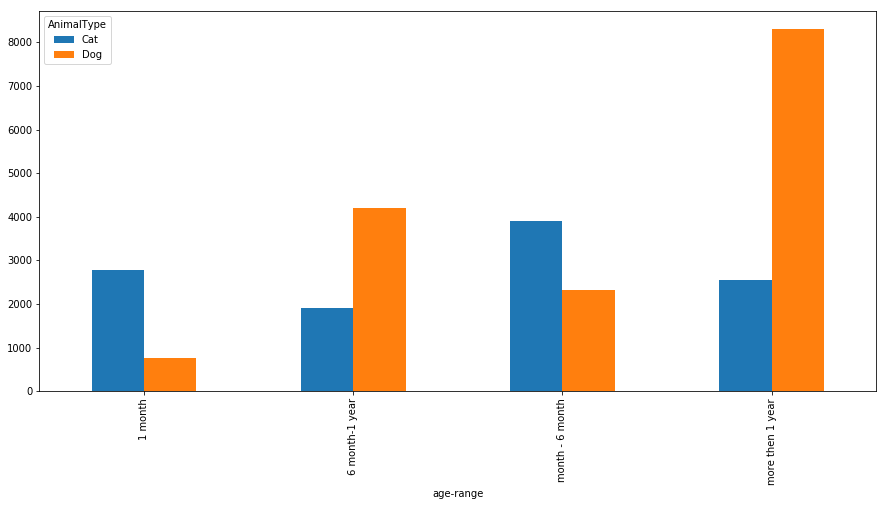

In [306]:
df_age=pd.pivot_table(df_data,
               index='age-range',
               columns='AnimalType', 
               values='AnimalID', 
               aggfunc='count',
               fill_value=0)
df_age.plot(kind='bar',figsize=(15, 7))

Finding Animal age distribution -  Percent from total

In [382]:
df_age=pd.pivot_table(df_data,
               index='age-range',
               columns=['AnimalType','OutcomeType'], 
               values='AnimalID', 
               aggfunc='count',
               margins=True,
               fill_value=0)
df_age

AnimalType            Cat                  ...               Dog             All
OutcomeType      Adoption Died Euthanasia  ...   Return_to_owner Transfer       
age-range                                  ...                                  
1 month               194   90        181  ...                36      446   3540
6 month-1 year        552    9        106  ...               904     1033   6094
month - 6 month      2837   27         81  ...               158      711   6225
more then 1 year      689   21        341  ...              3188     1727  10852
All                  4272  147        709  ...              4286     3917  26711

[5 rows x 11 columns]

In [385]:
#df_age.iloc[-1]

In [384]:
#df_age['All']
df_percentage = np.round(df_age*100/df_age.iloc[-1, -1], 1)

print(df_percentage)

AnimalType            Cat                  ...               Dog             All
OutcomeType      Adoption Died Euthanasia  ...   Return_to_owner Transfer       
age-range                                  ...                                  
1 month               0.7  0.3        0.7  ...               0.1      1.7   13.3
6 month-1 year        2.1  0.0        0.4  ...               3.4      3.9   22.8
month - 6 month      10.6  0.1        0.3  ...               0.6      2.7   23.3
more then 1 year      2.6  0.1        1.3  ...              11.9      6.5   40.6
All                  16.0  0.6        2.7  ...              16.0     14.7  100.0

[5 rows x 11 columns]


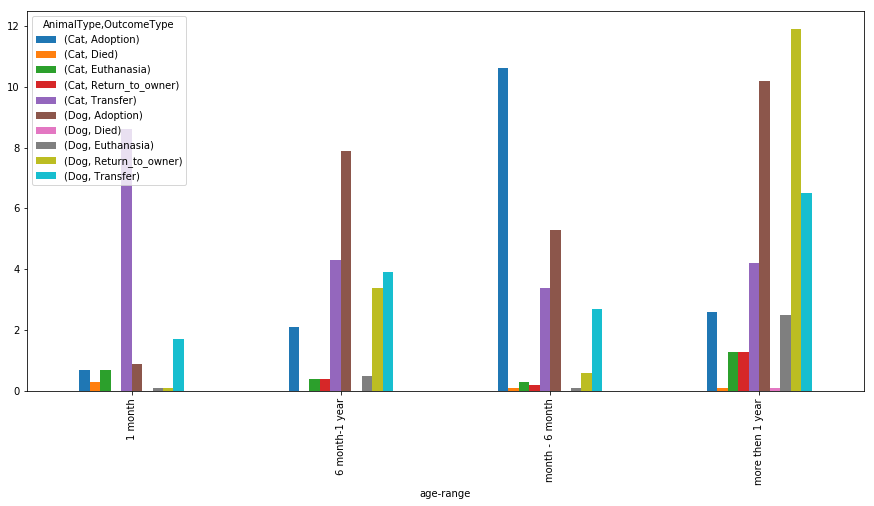

In [364]:
df_percentage.iloc[:-1,:-1].plot(kind='bar',figsize=(15, 7))

Finding Animal age distribution - Percent from row total group by AnimalType

In [371]:
df_percentage = np.round(df_age*100/df_age.iloc[-1], 1)

print(df_percentage)

AnimalType            Cat         ...        Dog    All
OutcomeType      Adoption   Died  ...   Transfer       
age-range                         ...                  
1 month               4.5   61.2  ...       11.4   13.3
6 month-1 year       12.9    6.1  ...       26.4   22.8
month - 6 month      66.4   18.4  ...       18.2   23.3
more then 1 year     16.1   14.3  ...       44.1   40.6
All                 100.0  100.0  ...      100.0  100.0

[5 rows x 11 columns]


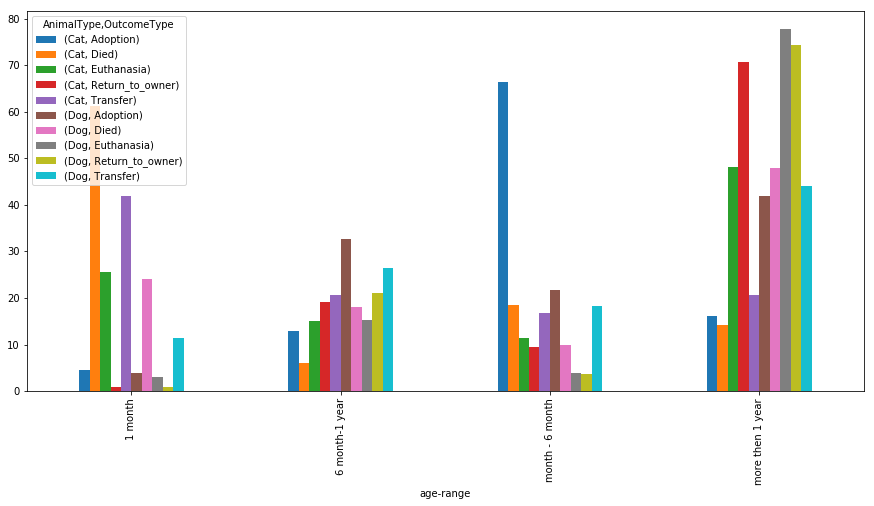

In [374]:
df_percentage.iloc[:-1,:-1].plot(kind='bar',figsize=(15, 7))